# Python_Competitive_Programming_DFS

---

## DFS ( Depth-First Search )

- 깊이 우선 탐색 ( 그래프에서 깊은 부분을 우선적으로 탐색하는 알고리즘 ) 


- **스택 자료구조(혹은 재귀 함수)** 를 이용하여 구현



1. 탐색 시작 노드를 스택에 삽입하고, 방문 처리를 합니다.


2. 스택의 최상단 노드에 방문하지 않은 인접한 노드가 하나라도 있으면, 그 노드를 스택에 넣고 방문 처리합니다. 
    - 방문하지 않은 인접 노드(new)가 없으면, 스택에서 최상단 노드(last node) 를 꺼냅니다.


3. 더 이상 2번의 과정을 수행할 수 없을 때까지 반복합니다.


- 동작 시 시작 노드의 방문 기준 참고 (ex: 번호가 낮은 인접 노드 부터)



---

## DFS 동작 과정

1. 시작 노드 '1' 스택 삽입후 방문 처리

2. '1' 인접 노드 '2' 확인, '2' 스택 삽입후 방문 처리

3. '2' 인접 노드 '7' 확인, '7' 스택 삽입후 방문 처리

4. '7' 인접 노드 '6' 확인, '6' 스택 삽입후 방문 처리

5. '6' 노드에서 인접 노드 확인 > 인접 노드('7') 중 방문 안한 노드 없음 > 더이상 깊게 들어 갈수 없음. 

6. 스택에서 '6' pop

7. '7' 인접 노드 '8' 확인, '8' 스택 삽입후 방문 처리


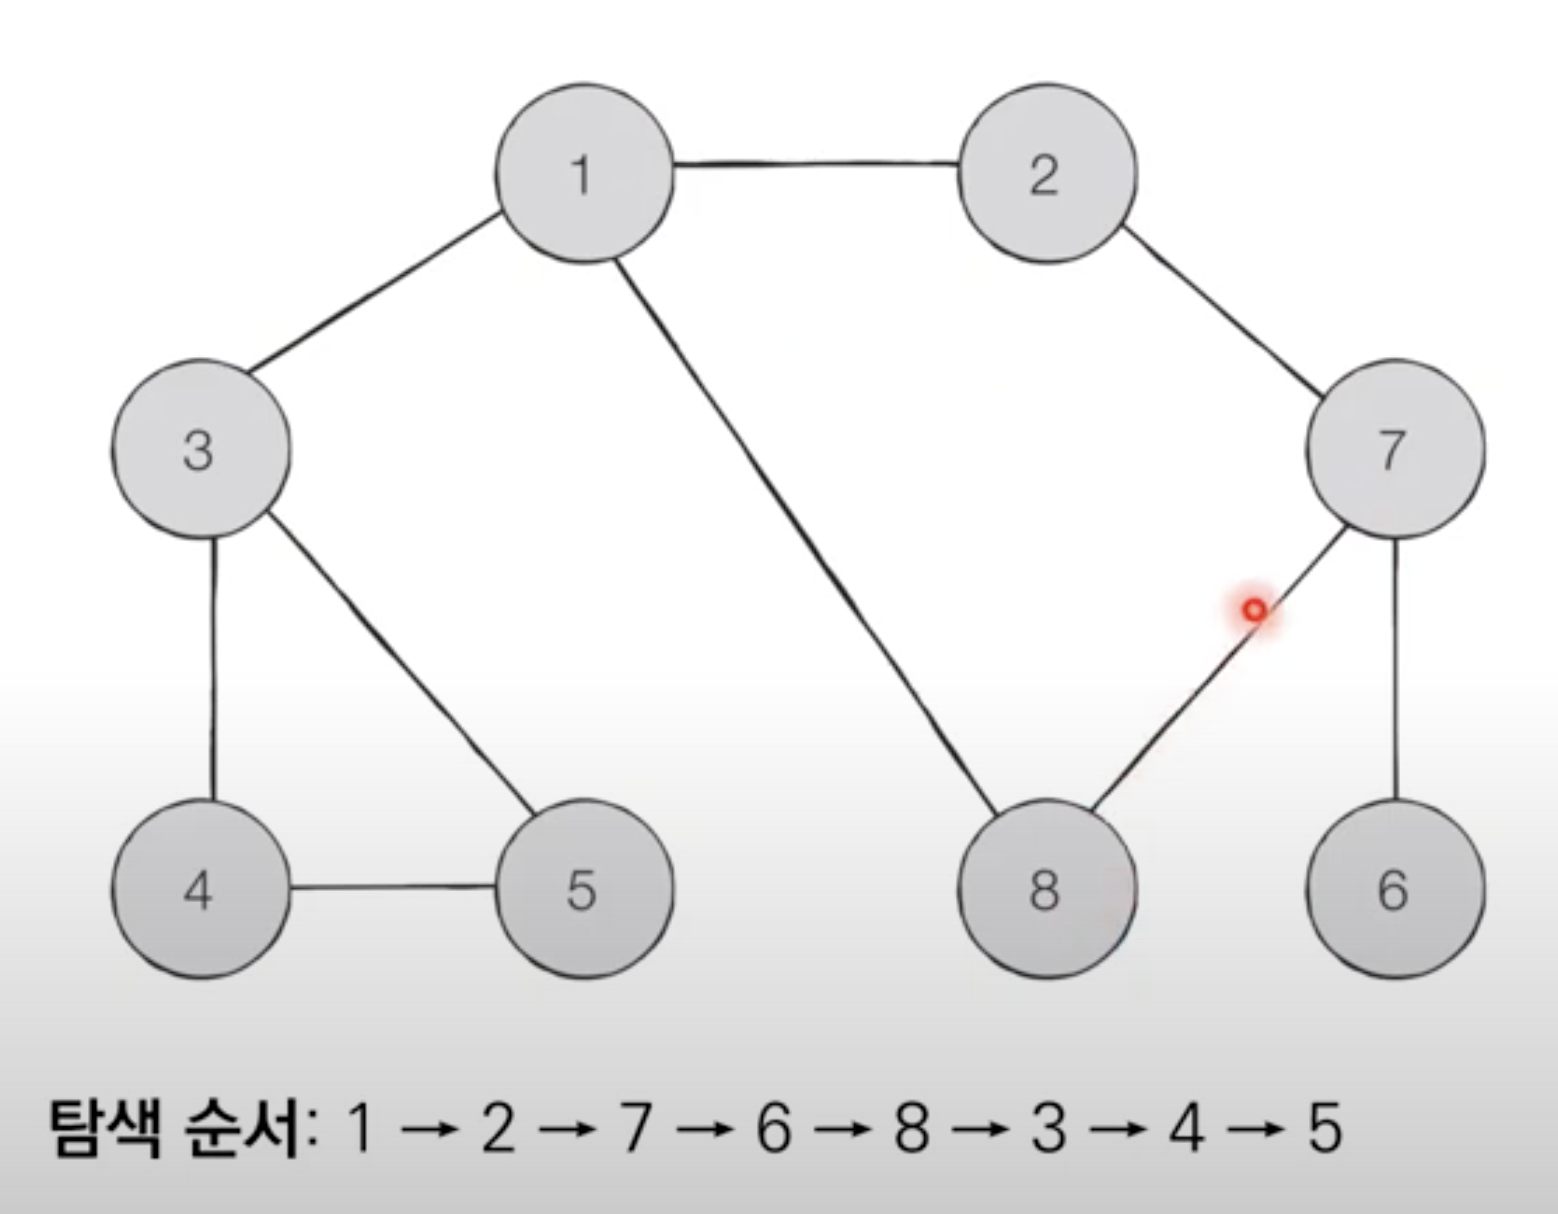 

---

## Src - DFS_recursive

- 그래프를 표현하는데 2차원 리스트 사용


- 노드번호 1번부터 시작하므로, idx 0번 째 리스트 는 빈 리스트로 처리


- 그래프에는 1번 노드부터 인접한 노드가 무엇인지 명시



- 스택 자료 구조 : 방문처리 명시를 위해 아직 하나도 방문하지 않은 visted [False] 리스트를 생성


- DFS 함수 정의
    - 입력 :  그래프, 시작노드, 방문처리 리스트


- 방문하지 않은 노드를 우선적으로 방문, 그중에서는 노드번호가 낮은순으로 방문 ( 방문 기준 참고 ) 

---

In [25]:

# DFS 함수 정의
def dfs(graph, v, visited):
    
    # 현재 노드를 방문 처리
    visited[v] = True
    print(v, end = ' ')
    # 현재 노드와 연결된 다른 노드를 재귀적으로 방문
    for i in graph[v]:
        
        if not visited[i]:
            dfs(graph, i, visited)
            

# 각 노드가 연결된 정보를 리스트 자료형으로 표현(2차원 리스트)
# 1번 노드 ~ 8번 노드 정보 이므로, idx 0은 비워둠

graph = [
  [],
  [2, 3, 8],
  [1, 7],
  [1, 4, 5],
  [3, 5],
  [3, 4],
  [7],
  [2, 6, 8],
  [1, 7]
]

# 각 노드가 방문된 정보를 스택에 저장 리스트 자료형으로 표현(1차원 리스트), 방문 시 True
# idx 0 사용 x 1~8번 노드  방문할 노드 False로 초기화 
visited = [False] * 9 

# 정의된 DFS 함수 호출
dfs(graph, 1, visited)

1 2 7 6 8 3 4 5 

---

## <문제> 음료수 얼려 먹기 (Connected Component)
 
- 구멍이 뚫려 있는 부분은 0, 칸막이가 존재하는 부분은 1로 표시


- 구멍이 뚫려 있는 부분끼리 상,하,좌,우 로 붙어 있는 겨우 서로 연결되어 있는것으로 간주


- 얼음 틀 모양이 주어졌을 때 생성되는 총 아이스크림의 개수를 구하는 프로그램 작성



---

### 해결 아이디어 -음료수 얼려 먹기

- DFS

- **공간이 상 하 좌 우 로 연결되어 있다고 표현할 수 있으므로, 그래프 형태로 모델링 할 수 있습니다**


1. 특정한 지점의 주변 상 하 좌 우를 살펴본 뒤에, 주변 지점 중에서 값이 0 이면서 아직 방문하지 않은 지점이 있다면, 해당 지점을 방문


2. 방문한 지점에서 다시 상 하 좌 우를 살펴보면서, 방문을 진행하는 과정을 반복하면, 연결된 모든 지점 방문 가능


3. 모든 노드에 대하여 1~2번 과정 반복 방문하지 않은 지점의 수 카운트



- 칸막이가 존재하는 1 부분을 이동이 불가 부분으로 처리 

---

In [28]:

def dfs(x, y):
    
    # 주어진 범위를 벗어나는 경우에는 즉시 종료
    if x <= -1 or x >= n or y <= -1 or y >= m: 
        return False 
    
    # 현재 노드를 아직 방문하지 않았다면, 해당 노드 방문 처리
    if graph[x][y] == 0:
        graph[x][y] = 1
        
        # 상, 하, 좌, 우의 위치들도 모두 재귀적으로 호출
        dfs(x - 1, y)
        dfs(x, y - 1)
        dfs(x + 1, y)
        dfs(x, y + 1)
        
        return True
     
    return False



# N(세로), M(가로) 을 공백을 기준으로 구분하여 입력 받기
# 2차원 리스트의 맵 정보 입력 받기

n, m = map(int, input().split())

# 2차원 리스트의 맵 정보 입력 받기

graph = []
for i in range(n):
    graph.append(list(map(int, input())))

# DFS로 특정한 노드를 방문한 뒤에 연결된 모든 노드들도 방문

 
# 모든 노드(위치)에 대하여 음료수 채우기

result = 0

for i in range(n):
    
    for j in range(m):
        # 현재 위치에서 DFS 수행
        if dfs(i, j) == True: 
            
            result += 1

print(result) # 정답 출력

4 5
00110
00011
11111
00000
3
